### **L1,L2正则项**

In [9]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score#精确性分数
import warnings
warnings.filterwarnings("ignore")

data = load_breast_cancer()#乳腺癌数据集
X = data.data
y = data.target
 
X.data.shape#(569, 30)
 
lrl1 = LR(penalty="l1",solver="liblinear",C=0.5,max_iter=1000)
 
lrl2 = LR(penalty="l2",solver="liblinear",C=0.5,max_iter=1000)
 
#逻辑回归的重要属性coef_，查看每个特征所对应的参数
lrl1 = lrl1.fit(X,y)
lrl1.coef_
 
(lrl1.coef_ != 0).sum(axis=1)#array([10])    30个特征中有10个特征的系数不为0
 
lrl2 = lrl2.fit(X,y)
lrl2.coef_

array([[ 1.61358623e+00,  1.00284781e-01,  4.61036191e-02,
        -4.21333984e-03, -9.27388895e-02, -3.00561176e-01,
        -4.53477303e-01, -2.19973055e-01, -1.33257382e-01,
        -1.92654788e-02,  1.87887747e-02,  8.75532438e-01,
         1.31708341e-01, -9.53440922e-02, -9.64408195e-03,
        -2.52457845e-02, -5.83085040e-02, -2.67948347e-02,
        -2.74103894e-02, -6.09326731e-05,  1.28405755e+00,
        -3.00219699e-01, -1.74217870e-01, -2.23449384e-02,
        -1.70489339e-01, -8.77400140e-01, -1.15869741e+00,
        -4.22909464e-01, -4.12968162e-01, -8.66604813e-02]])

### **L1,L2正则项学习曲线**

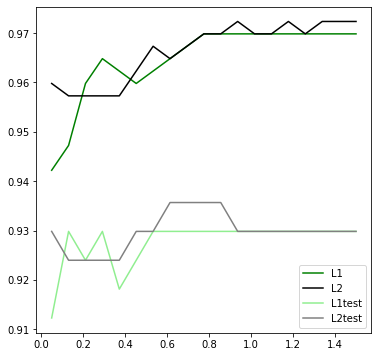

In [2]:
l1 = []
l2 = []
l1test = []
l2test = []
 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)
 
for i in np.linspace(0.05,1.5,19):
    lrl1 = LR(penalty="l1",solver="liblinear",C=i,max_iter=1000)
    lrl2 = LR(penalty="l2",solver="liblinear",C=i,max_iter=1000)
    
    lrl1 = lrl1.fit(Xtrain,Ytrain)
    l1.append(accuracy_score(lrl1.predict(Xtrain),Ytrain))
    l1test.append(accuracy_score(lrl1.predict(Xtest),Ytest))
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))
 
graph = [l1,l2,l1test,l2test]
color = ["green","black","lightgreen","gray"]
label = ["L1","L2","L1test","L2test"]    
 
plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1.5,19),graph[i],color[i],label=label[i])
plt.legend(loc=4) #图例的位置在哪里?4表示，右下角
plt.show()


### **高效的特征嵌入法embedded**

In [1]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
 
data = load_breast_cancer()
data.data.shape

(569, 30)

In [2]:
LR_ = LR(solver="liblinear",C=0.9,random_state=420)
cross_val_score(LR_,data.data,data.target,cv=10).mean()
 
X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
 
X_embedded.shape#(569, 9)

cross_val_score(LR_,X_embedded,data.target,cv=10).mean()#0.9368323826808401


0.9368107769423559

threshold学习曲线

(0.0, 30)
(0.10699266486102965, 17)
(0.2139853297220593, 12)
(0.32097799458308895, 11)
(0.4279706594441186, 8)
(0.5349633243051483, 8)
(0.6419559891661779, 6)
(0.7489486540272076, 5)
(0.8559413188882372, 5)
(0.9629339837492669, 5)
(1.0699266486102965, 5)
(1.176919313471326, 4)
(1.2839119783323558, 2)
(1.3909046431933856, 2)
(1.4978973080544151, 2)
(1.6048899729154447, 1)
(1.7118826377764744, 1)
(1.8188753026375042, 1)
(1.9258679674985337, 1)
(2.0328606323595633, 1)


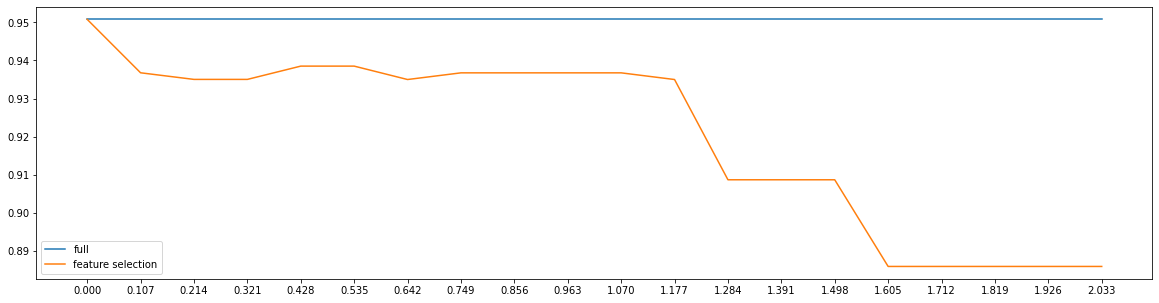

In [3]:
fullx = []
fsx = []
 
threshold = np.linspace(0,abs((LR_.fit(data.data,data.target).coef_)).max(),20)
 
k=0
for i in threshold:
    X_embedded = SelectFromModel(LR_,threshold=i).fit_transform(data.data,data.target)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=5).mean())
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=5).mean())
    print((threshold[k],X_embedded.shape[1]))
    k+=1
    
plt.figure(figsize=(20,5))
plt.plot(threshold,fullx,label="full")
plt.plot(threshold,fsx,label="feature selection")
plt.xticks(threshold)
plt.legend()
plt.show()

原模型的C学习曲线

0.9561090225563911 6.01


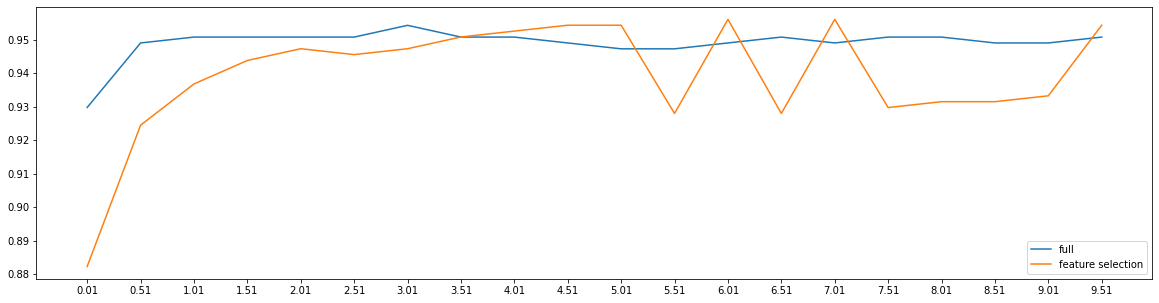

In [4]:
fullx = []
fsx = []
 
C=np.arange(0.01,10.01,0.5)
 
for i in C:
    LR_ = LR(solver="liblinear",C=i,random_state=420)
    
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=10).mean())
    
    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=10).mean())
    
print(max(fsx),C[fsx.index(max(fsx))])
 
plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="full")
plt.plot(C,fsx,label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()


细化学习曲线

0.9561090225563911 6.079999999999999


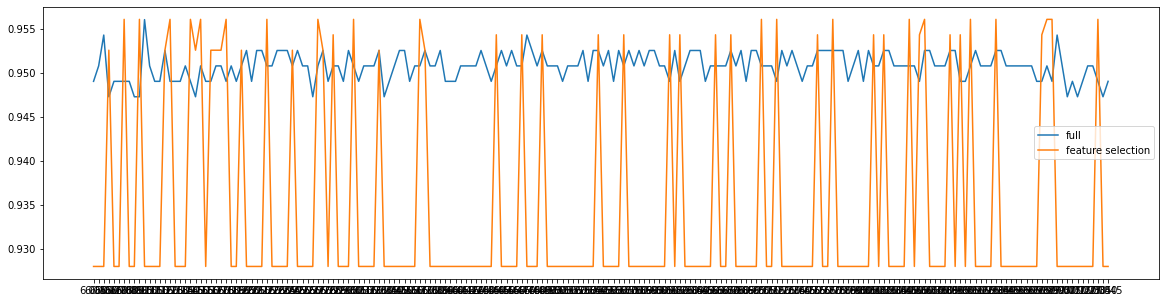

(569, 10)

In [5]:
fullx = []
fsx = []
 
C=np.arange(6.05,7.05,0.005)
 
for i in C:
    LR_ = LR(solver="liblinear",C=i,random_state=420)
    
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=10).mean())
    
    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=10).mean())
    
print(max(fsx),C[fsx.index(max(fsx))])
 
plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="full")
plt.plot(C,fsx,label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()
 
#验证模型效果：降维之前
LR_ = LR(solver="liblinear",C=6.069999999999999,random_state=420)
cross_val_score(LR_,data.data,data.target,cv=10).mean()#0.947360859044162
 
#验证模型效果：降维之后
LR_ = LR(solver="liblinear",C=6.069999999999999,random_state=420)
X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
cross_val_score(LR_,X_embedded,data.target,cv=10).mean()#0.9580405755768732
 
X_embedded.shape#(569, 10)

### **重要参数：max_iter**

In [ ]:
"""
在我们开始梯度下降之前，我们并不
知道什么样的步长才合适，但梯度下降一定要在某个时候停止才可以，
否则模型可能会无限地迭代下去。
因此，在sklearn当中，我们设置参数max_iter最大迭代次数来代替步长，
帮助我们控制模型的迭代速度并适时地让模型停下。
max_iter越大，代表步长越小，模型迭代时间越长，
反之，则代表步长设置很大，模型迭代时间很短。
"""

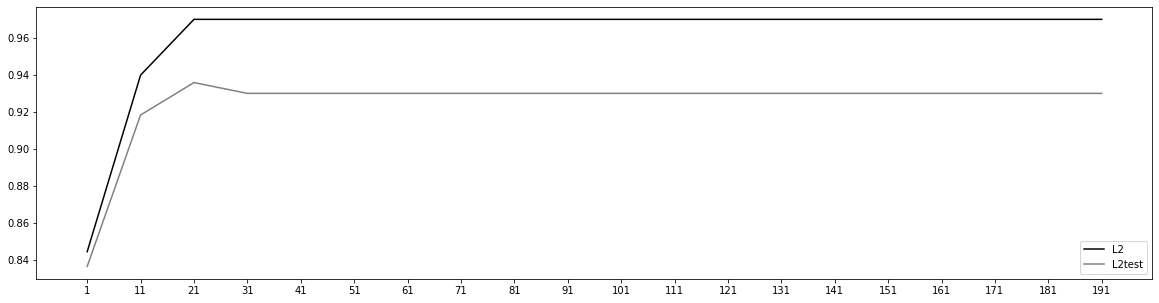

array([25], dtype=int32)

In [10]:
l2 = []
l2test = []
 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)
 
for i in np.arange(1,201,10):
    lrl2 = LR(penalty="l2",solver="liblinear",C=0.9,max_iter=i)
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))
    
graph = [l2,l2test]
color = ["black","gray"]
label = ["L2","L2test"]
    
plt.figure(figsize=(20,5))
for i in range(len(graph)):
    plt.plot(np.arange(1,201,10),graph[i],color[i],label=label[i])
plt.legend(loc=4)
plt.xticks(np.arange(1,201,10))
plt.show()
 
#我们可以使用属性.n_iter_来调用本次求解中真正实现的迭代次数
 
lr = LR(penalty="l2",solver="liblinear",C=0.9,max_iter=300).fit(Xtrain,Ytrain)
lr.n_iter_#array([24], dtype=int32)  只迭代了24次就达到收敛

### **多分类问题**

In [11]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.target#三分类数据集

for multi_class in ('multinomial', 'ovr'):
    clf = LR(solver='sag', max_iter=100, random_state=42,
                             multi_class=multi_class).fit(iris.data, iris.target)
 
#打印两种multi_class模式下的训练分数
#%的用法，用%来代替打印的字符串中，想由变量替换的部分。%.3f表示，保留三位小数的浮点数。%s表示，字符串。
#字符串后的%后使用元祖来容纳变量，字符串中有几个%，元祖中就需要有几个变量
 
    print("training score : %.3f (%s)" % (clf.score(iris.data, iris.target), multi_class))

training score : 0.987 (multinomial)
training score : 0.960 (ovr)
